## Flow chart for the Initialization Stage

In [1]:
from graphviz import Digraph

dot = Digraph('Initialization Stage', 
              node_attr={'style': 'filled',
                         'shape': 'box',
                         'fillcolor':'lightblue',  
                         'fontcolor': 'black', 
                         'color': 'black'}, 
              engine='neato', 
              )

# Adjusting Paremeters of the graph
# Add a title
dot.attr(label='Initialization Stage \n\n', 
         labelloc='t',
         fontsize='20',      # Adjust this for size
         fontcolor='black',    # Adjust this for color
         labeljust='c',      # Centered; use 'l' for left and 'r' for right
        )

# Define the direction of the flow ('TB' Top-Bottom or 'LR' Low-Right) 
#dot.attr(rankdir='TB')

# Adjust Node Spacing
dot.attr(ranksep='1')

# Setting colors for nodes
dot.node('A', 'Initialization of the \n first 2 clusters')
dot.node('B', 'Find boundaries between \n the initital clusters.')
dot.node('C', 'Allocate data points \n to their \n corresponding clusters.')
dot.node('D', 'Recalculate \n cluster positionns \n based on the \n average.')
dot.node('E', 'Find the new boundaries \n between these \n recalculated clusters.')
dot.node('F', 'Assign data points \n to their \n corresponding \n recalculated clusters.')

# Setting colors for edges
dot.edge('A', 'B')
dot.edge('B', 'C')
dot.edge('C', 'D')
dot.edge('D', 'E')
dot.edge('E', 'F')
#dot.edge('F', 'A')
#dot.edge('G', 'H')

#dot.render('analytics_flowchart', format='png', view=True)

## Datapoints 

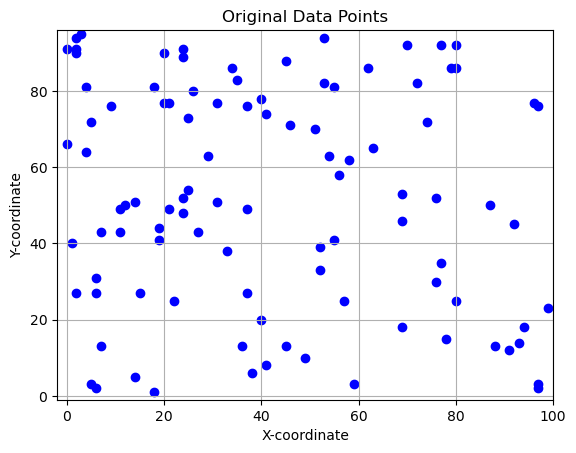

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import visualize_data
import utils

# Datapoints from exapmle in the book of reference.
#X = np.array(([2,3], [6,6], [7,8], [8,7], [9,7], [10,10]))

# New set of datapoints
X = np.array(([2,3], [1,1], [4,1], [4,4], [5,5], [6,6], [7,8], [8,7], [9,7], [9,10], [10,10]))

# Set of random n points with 2D
n_points = 100
upper_bound = 100
lower_bound = 0
#X = utils.generate_random_points(n_points, lower_bound,upper_bound)

visualize_data.plot_data(X, title="Original Data Points")

## Clusters initialization

- The 1st cluster is initialized as the average of all data points.
- the 2nd cluster is computed as the sum of the 1st cluster with a defined value <b>(Improve this criterium)</b>

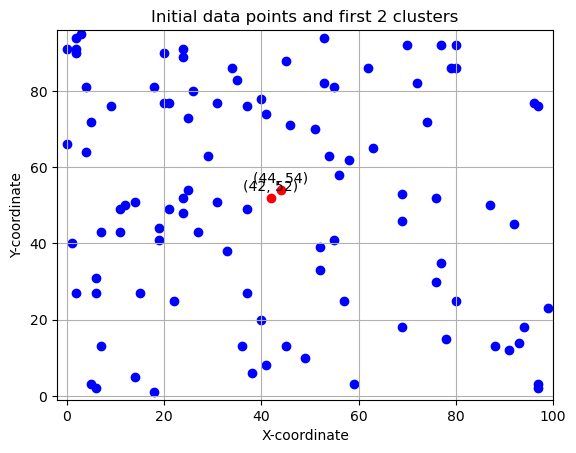

In [3]:
# 1st initial cluster = Average of datapoints 
CH = np.zeros((1,X.shape[1])) 
CH[0] = np.round(np.mean(X, axis=0))
CH = CH.astype(int) # For eliminate the ".0" in the graph

# Define the tolerance E 
E = 2

# Next Cluster using adding the E
CH = np.vstack((CH, CH[CH.shape[0]-1] + E)) # Add the new cluster at the bottom

# Sort cluster array
CH = np.sort(CH, axis=0)

visualize_data.plot_data(X, CH=CH, show_CHs=True, title='Initial data points and first 2 clusters')


## Performing clustering algorithm

### Flow chart for the clustering addition process

In [4]:
from graphviz import Digraph

dot = Digraph('Cluster Addition Process', 
              node_attr={'style': 'filled',
                         'shape': 'box',
                         'fillcolor':'lightblue',  
                         'fontcolor': 'black', 
                         'color': 'black'}, 
              engine='dot', 
              )

# Adjusting Paremeters of the graph
dot.attr(label='Cluster Update Process \n\n', 
        labelloc='t',
        fontsize='20',
        fontcolor='black',
        labeljust='c', 
        rankdir='TP',
        ranksep='0.3')

# Setting the nodes
dot.node('A', 'Initial Stage')

# Conditional diamond node
dot.node('B', 'Evaluate if the actual \n square residual is \n too much greater than \n the previous one.', 
         shape='diamond', fillcolor='lightpink')

# Paths based on condition
dot.node('B1', 'Stop')
dot.node('B2', 'Find the farest \n euclidean distance \n from a node to its \n corresponding cluster.')
dot.node('B3', 'Evaluate the criterium \n for adding a new cluster.')
dot.node('B4', 'Find the new boundaries \n with the new added cluster.')
dot.node('B5', 'Assign data points \n to their \n corresponding clusters \n with the new clusters.')
dot.node('B6', 'Recalculate cluster \n positionns based on \n the average.')
dot.node('B7', 'Compute the squared \n residual between \n measurements and clusters.')

dot.edge('A', 'B')
dot.edge('B', 'B1', label='No')
dot.edge('B', 'B2', label='Yes')
dot.edge('B2', 'B3')
dot.edge('B3', 'B4')
dot.edge('B4', 'B5')
dot.edge('B5', 'B6')
dot.edge('B6', 'B7')
dot.edge('B7', 'B', label='Evaluate again')  # Looping back edge

#dot.render('clustes_update_process', format='png', view=True)

### Relocating Clusters

Once the first 2 clusters are placed it is necessary to relocate them based on the average of the point that belong to each one of them.

#### Initial stage

1. Find boundaries between the initital clusters.
2. Allocate data points to their corresponding clusters based on the minimal distance to a cluster.
3. Compute the squared residual between measurements and the initial clusters.
4. Recalculate cluster positionns based on the average of the data points that belong to each of them. 
5. Find the new boundaries between these recalculated clusters.
6. Assign data points to their corresponding recalculated cluster.
7. Compute the squared residual between measurements and the recalculated clusters.

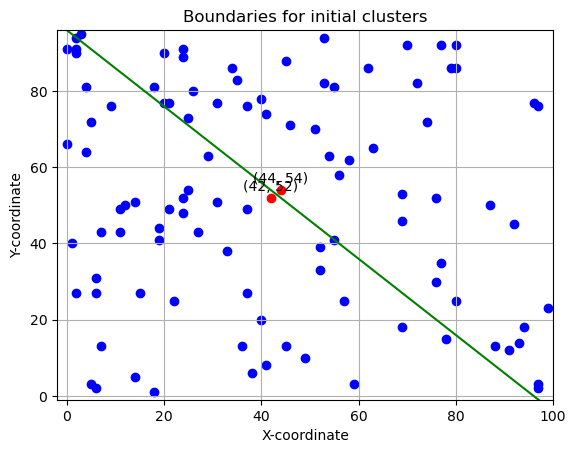

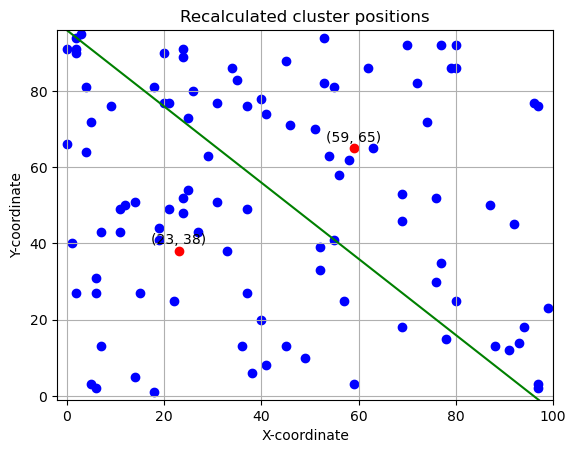

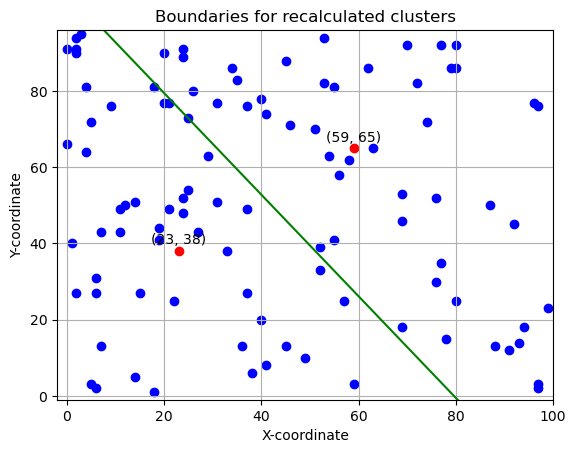

In [5]:
import utils

# !!!! INITIAL STAGE !!!!

D = 0 # Square Residual between measurements

# Step 1: Find boundaries between the initital clusters.
boundaries_points, boundaries_lines_m, boundaries_lines_b = utils.find_boundaries(X, CH, title='Boundaries for initial clusters')

# Step 2: Assign the points to their corresponding clusters
cluster_points = utils.allocate_datapoints(X, CH, boundaries_lines_m, boundaries_lines_b)

# Step 3: Compute the squared residual between measurements and the initial clusters.
D_new = utils.compute_D(CH, cluster_points)

# Step 4: Recalculate cluster positionns based on the average of the data points that belong to each of them.
new_CHs = utils.compute_centroids(X, CH.copy(), cluster_points, boundaries_points, boundaries_lines_m, boundaries_lines_b, title='Recalculated cluster positions')

# Update clusters
CH = new_CHs 

# Update D
D = D_new

# Step 5: Find the new boundaries between these recalculated clusters.
boundaries_points, boundaries_lines_m, boundaries_lines_b = utils.find_boundaries(X, CH, title='Boundaries for recalculated clusters')

# Step 6: Assign data points to their corresponding recalculated cluster.
cluster_points = utils.allocate_datapoints(X, CH, boundaries_lines_m, boundaries_lines_b)

# Step 7: Compute the squared residual between measurements and clusters.
D_new = utils.compute_D(CH, cluster_points)

# Update clusters
CH = new_CHs 

### Looking for new clusters

Once the first 2 clusters are allocated in the optimal positions is time to start with the algorithm.

1. Evaluate if the actual square residual is too much greater than the previous one.
2. In case there is a need for adding new cluster to decrease this metric a new cluster will be added.
3. Find the farest euclidean distance from a node to its corresponding cluster. 
4. Evaluate the criterium that if this maximum distance is greater 2 times than the average euclidean distance from all data points (that belong to the same cluster) to the cluster (the cluster that contains the farest node). 
5. Find the new boundaries with the new added cluster. 
6. Assign data points to their corresponding clusters with the new clusters.
7. Recalculate cluster positionns based on the average of the data points that belong to each of them.
8. Compute the squared residual between measurements and clusters.

The farest node [97  2] has a distance of 73.57309290766564 to the cluster [59 65]
The average distance from the nodes to this cluster is 32.7571595507583
newCH = [96 28], last_CH = [59 65]


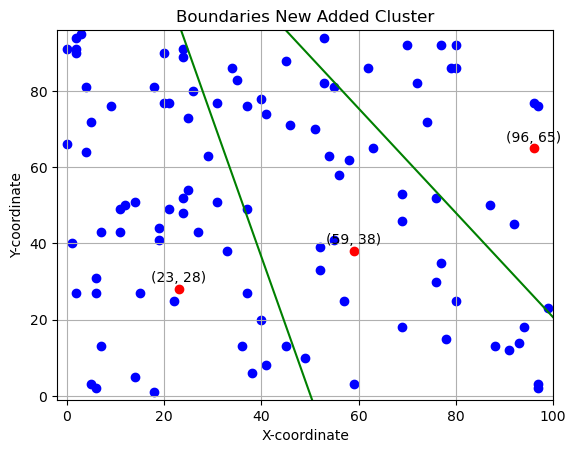

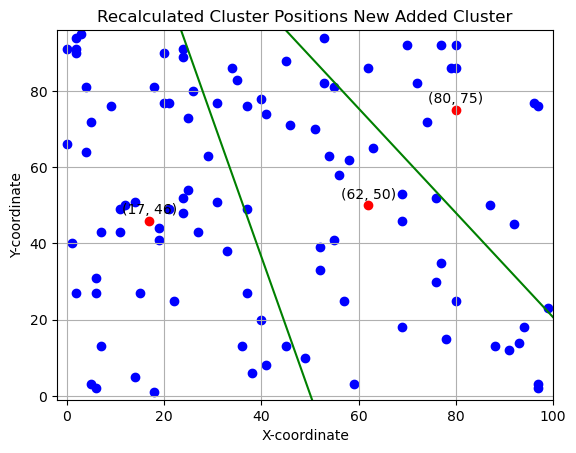

count: 0, D_new: 131043.0, D = 121159.0
farest point distance from cluster 0: 50.96076922496363
mimimum distance between clusters for cluster 0: 45.17742799230607
True
The farest node [97  2] has a distance of 59.405386961116584 to the cluster [62 50]
The average distance from the nodes to this cluster is 30.797039388627923
newCH = [92 20], last_CH = [62 50]


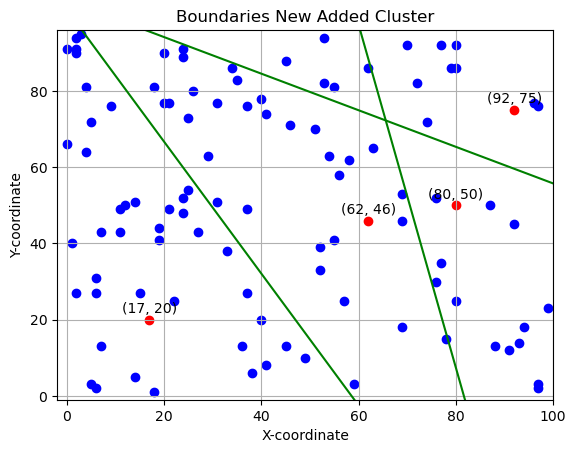

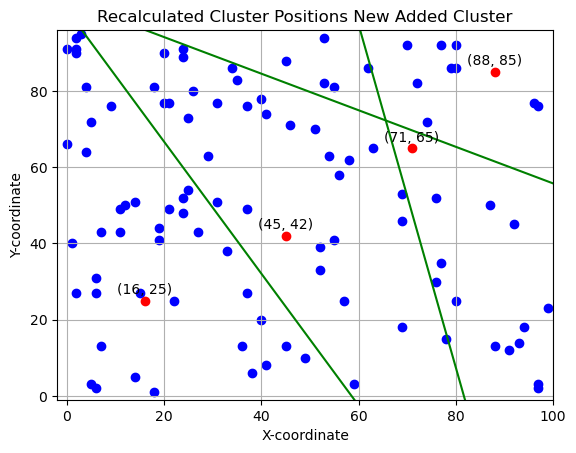

count: 1, D_new: 138027.0, D = 131043.0
farest point distance from cluster 0: 71.19691004531025
mimimum distance between clusters for cluster 0: 33.61547262794322
True
The farest node [ 3 95] has a distance of 71.19691004531025 to the cluster [16 25]
The average distance from the nodes to this cluster is 30.62456560430492
newCH = [ 0 61], last_CH = [16 25]


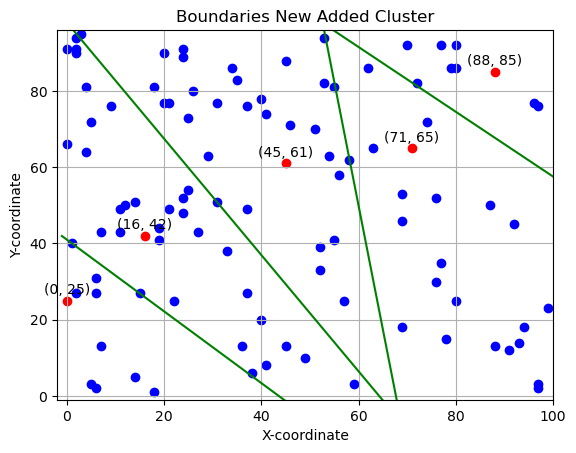

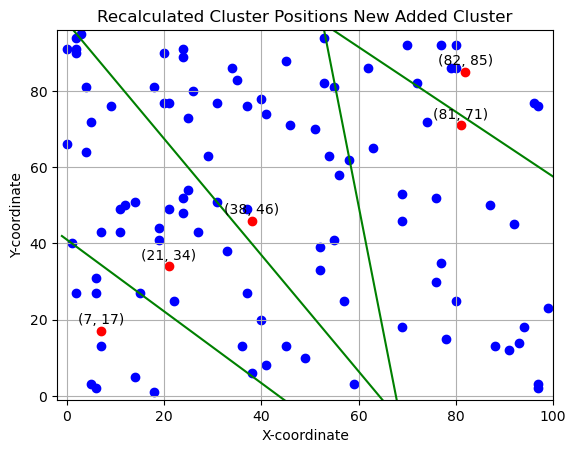

count: 2, D_new: 92306.0, D = 138027.0
farest point distance from cluster 0: 23.769728648009426
mimimum distance between clusters for cluster 0: 22.02271554554524
True
The farest node [97  2] has a distance of 70.83078426785913 to the cluster [81 71]
The average distance from the nodes to this cluster is 41.31636839016555


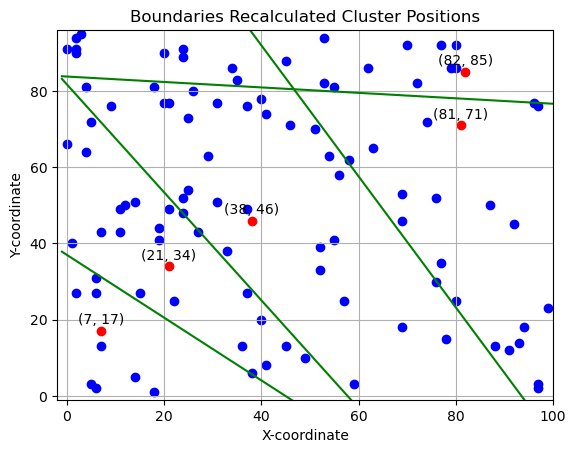

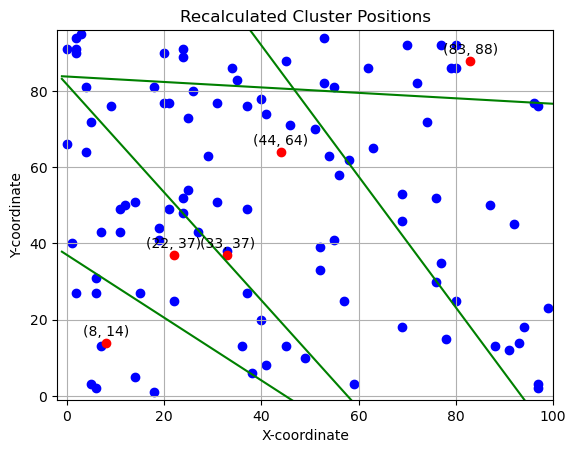

count: 3, D_new: 155187.0, D = 92306.0
farest point distance from cluster 0: 17.11724276862369
mimimum distance between clusters for cluster 0: 26.92582403567252
farest point distance from cluster 1: 38.91015291668744
mimimum distance between clusters for cluster 1: 11.0
True
The farest node [ 0 91] has a distance of 83.05419917138447 to the cluster [83 88]
The average distance from the nodes to this cluster is 40.80334374086033
newCH = [ 41 100], last_CH = [83 88]


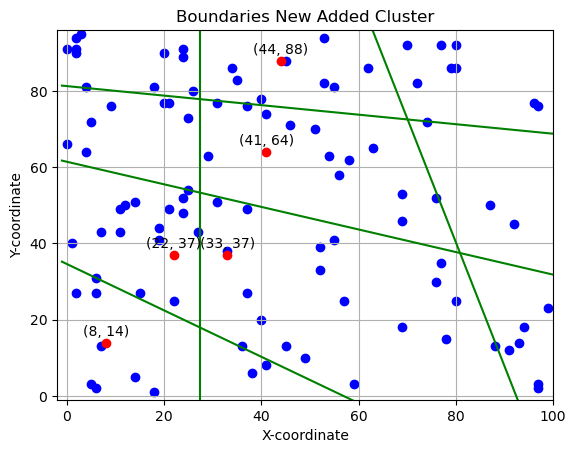

c:\Daniel\Maestría en Sistemas Digitales(Citedi)\2do Semestre\Fundamentos de IoT\Homeworks\Clustering algorithm\utils.py:104: RuntimeWarning: invalid value encountered in multiply
  and boundaries_lines_m[i]*point[0] + boundaries_lines_b[i] - point[1] >= 0]
c:\Daniel\Maestría en Sistemas Digitales(Citedi)\2do Semestre\Fundamentos de IoT\Homeworks\Clustering algorithm\utils.py:103: RuntimeWarning: invalid value encountered in multiply
  if boundaries_lines_m[i-1]*point[0] + boundaries_lines_b[i-1] - point[1] < 0


!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
There are 1 empty clusters
cluster [33 37]


ValueError: setting an array element with a sequence. The requested array would exceed the maximum number of dimension of 1.

In [6]:
cont = 0 # Counter for reference
added = False
deletion = False
# Evaluate stop criterium
criterium = abs((D_new- D) / D_new)
keep = False

while criterium >= 0.1 or (cont < 10): # Stop Criterium

    # Update D
    D = D_new

    # It is necessary to add a new cluster
    # Step 3: Find the farest distance from a node to its corresponding cluster. 
    dist_max_cluster, dist_max_point, dist_max, avg_dist = utils.find_farest_node(CH, cluster_points)
    
    # Step 4: Evaluate the criterium.
    if dist_max > (avg_dist * 2) or (keep == True and criterium <= 0.1):
        # Compute the new cluster to add
        new_CH = utils.add_centroid(dist_max_cluster, dist_max_point, dist_max, lower_bound, upper_bound)
        CH = np.vstack((CH,new_CH))
        CH = np.sort(CH, axis=0)
        added = True


    # Step 5: Find the new boundaries with the new added cluster. 
    if added:
        boundaries_points, boundaries_lines_m, boundaries_lines_b = utils.find_boundaries(X, CH, title='Boundaries New Added Cluster')
    else:
        boundaries_points, boundaries_lines_m, boundaries_lines_b = utils.find_boundaries(X, CH, title='Boundaries Recalculated Cluster Positions')

    # Step 6: Assign data points to their corresponding clusters with the new clusters.
    cluster_points = utils.allocate_datapoints(X, CH, boundaries_lines_m, boundaries_lines_b)
    
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    # Check if there is a cluster without any point.
    empty_clusters = [cluster for cluster, points in cluster_points.items() if not points]

    # If there exist empty cluster    
    while empty_clusters:
        deletion = True

        print('!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!')
        print(f'There are {len(empty_clusters)} empty clusters')
        # Remove the empty clusters
        for cluster in empty_clusters:
            print(f'cluster {CH[cluster]}')
            del cluster_points[cluster]

        # Extract the  clusters from the dictionary
        CH_modified = np.zeros((len(cluster_points), CH.shape[1])) # Create new cluster array 
        for i in cluster_points.keys():
            CH_modified[i] = cluster_points[i] # Fill the new cluster with the actual values from the dictionary
        # Sort cluster array
        CH_modified = np.sort(CH_modified, axis=0)

        # Rearrange the boundaries 
        boundaries_points, boundaries_lines_m, boundaries_lines_b = utils.find_boundaries(X, CH_modified, title='Boundaries Empty Cluster Deletion')

        # Assign data points to their corresponding clusters with deletion modification.
        cluster_points = utils.allocate_datapoints(X, CH, boundaries_lines_m, boundaries_lines_b)

        # Check again if there is a cluster without any point.
        empty_clusters = [cluster for cluster, points in cluster_points.items() if not points]

        # Update clusters
        CH = CH_modified

        deletion = False
#  !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!    

    # Step 7: Recalculate cluster positionns based on the average of the data points that belong to each of them.
    if added and not deletion:
        new_CHs = utils.compute_centroids(X, CH.copy(), cluster_points, boundaries_points, boundaries_lines_m, boundaries_lines_b,
                                          title='Recalculated Cluster Positions New Added Cluster')
    else:
        new_CHs = utils.compute_centroids(X, CH.copy(), cluster_points, boundaries_points, boundaries_lines_m, boundaries_lines_b,
                                          title='Recalculated Cluster Positions')
        
    # Step 8: Compute the squared residual between measurements and clusters.
    D_new = utils.compute_D(CH, cluster_points)
   
    print(f'count: {cont}, D_new: {D_new}, D = {D}')   

    # Updating variables
    CH = new_CHs    
    cont += 1
    added = False

    # Evaluate stop criterium
    criterium = abs((D_new- D) / D_new)
    keep = utils.check_distance_clusters(CH, cluster_points, boundaries_points)
    print(keep)